# Diabetese Prediction

#About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r'C:\Users\agaur\OneDrive\Desktop\MeriSKILL\Projects-20231010T170304Z-001\Projects\Project 2 - Diabetes Data\diabetes.csv',encoding='unicode_escape')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Replacing 0 with NaN values
diabetes_col = df.columns[:-1]
df[diabetes_col] = df[diabetes_col].replace({0:np.nan})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
df = df.fillna(df.mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [13]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

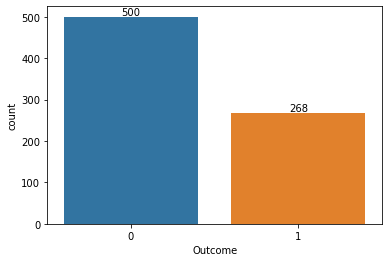

In [14]:
outcome = sns.countplot(x='Outcome',data=df)
for ax in outcome.containers:
    outcome.bar_label(ax)

<AxesSubplot:>

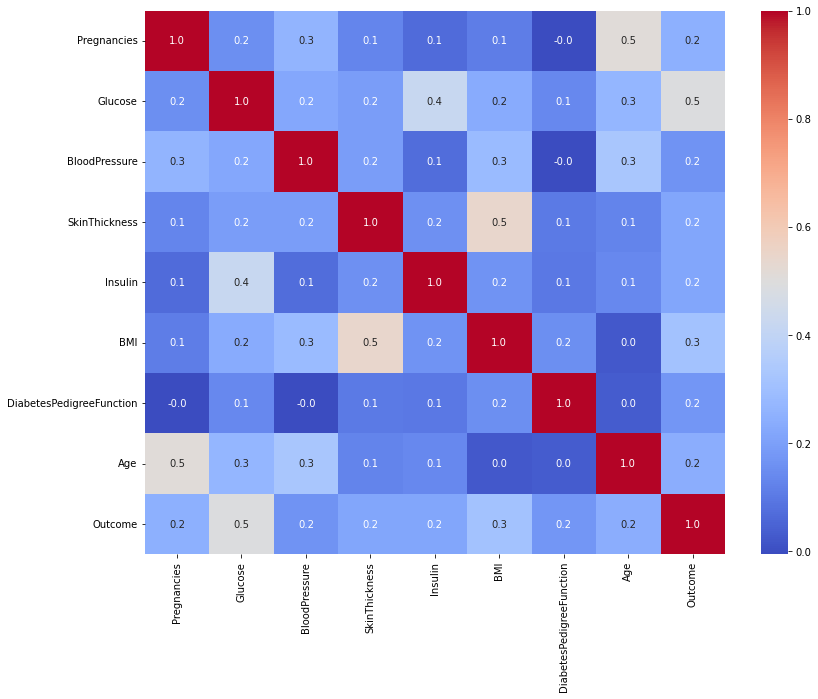

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap='coolwarm')

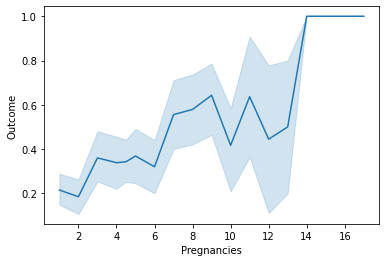

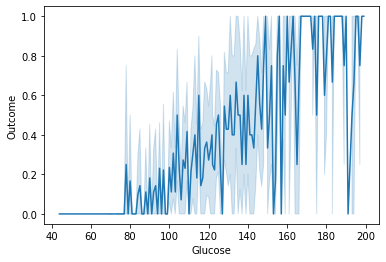

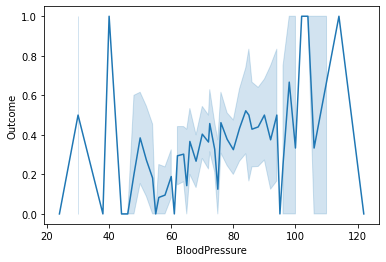

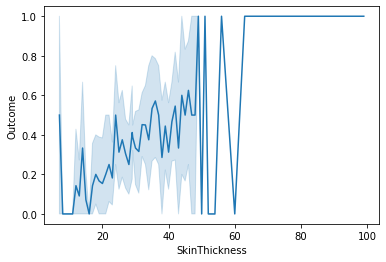

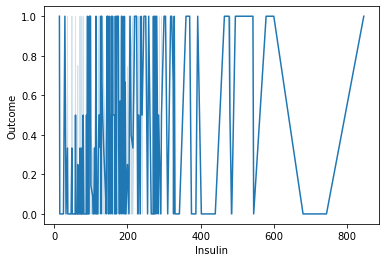

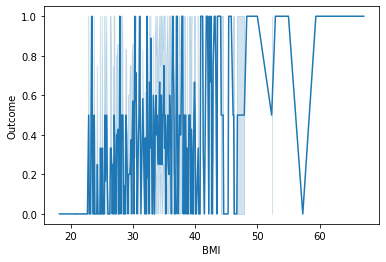

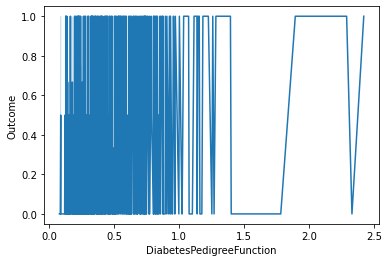

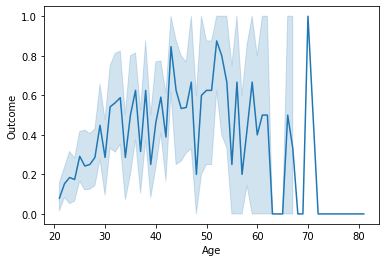

In [16]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    sns.lineplot(data=df,x=i,y='Outcome')
    plt.show()

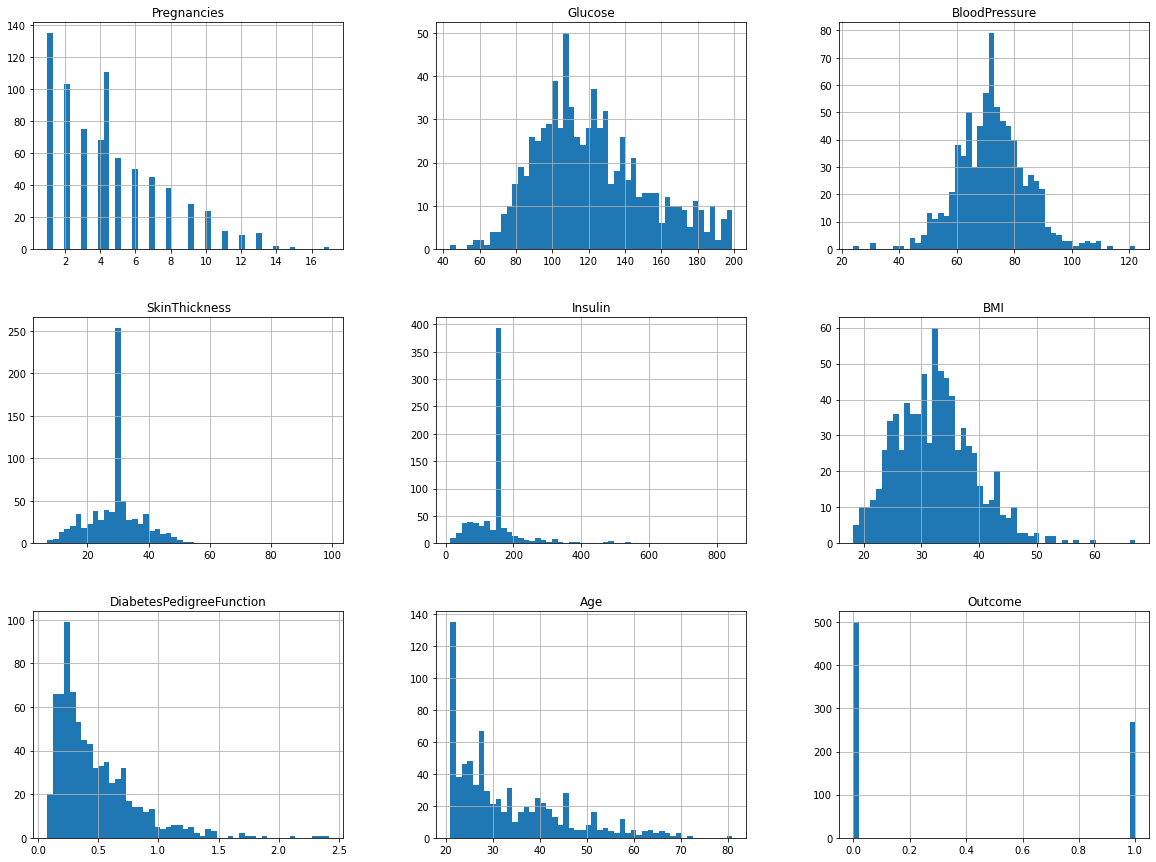

In [17]:
df.hist(bins=50,figsize=(20,15))
plt.show()

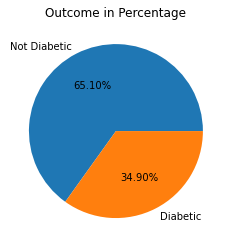

In [18]:
plt.title('Outcome in Percentage')
plt.pie(df['Outcome'].value_counts(),labels=['Not Diabetic','Diabetic'],autopct='%1.2f%%')
plt.show()

# Prediction Logistic Regression

In [19]:
#Splitting Data
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']
print(X)
print("--------------------------------------------------")
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [20]:
#Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(768, 8)
(614, 8)
(154, 8)


In [21]:
lr = LogisticRegression(max_iter=1000)

In [22]:
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [23]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred,Y_test)

array([[87, 28],
       [13, 26]], dtype=int64)

In [25]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy Score of test data : ",accuracy)

Accuracy Score of test data :  0.7337662337662337


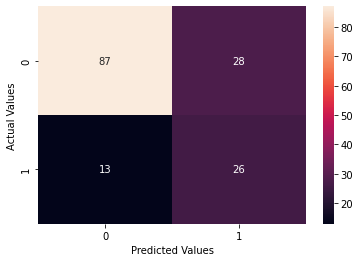

In [26]:
#Evaluating model
cf_matrix = confusion_matrix(Y_pred,Y_test)
sns.heatmap(cf_matrix,annot=True,fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [27]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



In [28]:
#Model Testing
import warnings
warnings.filterwarnings("ignore")
ipt_values = [10,155,65,22,173,22.5,0.697,50]
ipt_values_np_array = np.asarray(ipt_values)
ipt_values_reshape = ipt_values_np_array.reshape(1,-1)
predict = lr.predict(ipt_values_reshape)
print(predict)
if(predict[0]==0):
    print("You are not Diabetic")
else:
    print("You are Diabetic")

[1]
You are Diabetic


# Prediction Random Forest Classifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [31]:
Y_pred1 = rf.predict(X_test)
Y_pred1

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [32]:
confusion_matrix(Y_pred1,Y_test)

array([[86, 26],
       [14, 28]], dtype=int64)

In [33]:
accuracy=accuracy_score(Y_test,Y_pred1)
print("Accuracy Score of test data : ",accuracy)

Accuracy Score of test data :  0.7402597402597403


In [34]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [35]:
ipt_values1 = [5,120,43,20,143,20.5,0.497,30]
ipt_values_np_array1 = np.asarray(ipt_values1)
ipt_values_reshape1 = ipt_values_np_array1.reshape(1,-1)
predict1 = lr.predict(ipt_values_reshape1)
print(predict1)
if(predict1[0]==0):
    print("You are not Diabetic")
else:
    print("You are Diabetic")

[0]
You are not Diabetic


# Prediction KNN

In [38]:
KNN = KNeighborsClassifier()

In [39]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
Y_pred2 = KNN.predict(X_test)

In [41]:
Y_pred2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [42]:
confusion_matrix(Y_test,Y_pred2)

array([[85, 15],
       [28, 26]], dtype=int64)

In [44]:
accuracy1 = accuracy_score(Y_test,Y_pred2)
print("Accuracy Score of test data : ",accuracy1)

Accuracy Score of test data :  0.7207792207792207


In [45]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [46]:
ipt_values2 = [5,120,43,20,143,20.5,0.497,30]
ipt_values_np_array2 = np.asarray(ipt_values2)
ipt_values_reshape2 = ipt_values_np_array2.reshape(1,-1)
predict2 = KNN.predict(ipt_values_reshape2)
print(predict2)
if(predict1[0]==0):
    print("You are not Diabetic")
else:
    print("You are Diabetic")

[0]
You are not Diabetic


# Prediction SVM

In [47]:
from sklearn import svm

In [48]:
SVM = svm.SVC()
SVM.fit(X_train,Y_train)

SVC()

In [49]:
Y_pred3 = SVM.predict(X_test) 
Y_pred3

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [50]:
confusion_matrix(Y_pred3,Y_test)

array([[90, 30],
       [10, 24]], dtype=int64)

In [51]:
accuracy2 = accuracy_score(Y_test,Y_pred3)
print("Accuracy Score of test data : ",accuracy2)

Accuracy Score of test data :  0.7402597402597403


In [52]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.71      0.44      0.55        54

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.74      0.72       154

